In [1]:
import numpy as np
from astropy import coordinates as coo
from astropy import units as u
import healpy as hp
import matplotlib.pyplot as plt
import multiprocessing as mp

In [2]:
Nside_jack = 4
def weight_nan_mean(value, weight):
    mean_val = np.zeros(value.shape[1])
    for i in range(len(mean_val)):
        idx = np.logical_not(np.isnan(value[:,i]))
        val = value[idx,i]
        wei = weight[idx,i]
        mean_val[i] = np.average(val, weights=wei)
    return mean_val

In [4]:
dat_r = np.load('../calculation_data/result_r=0.5_100_15_random_point_tree.npy')

value_r = dat_r[0]
weight_r = dat_r[1]

theta, phi = np.loadtxt('../catalogue/random_sample_theta_phi_5_000_000').T

Nquas = len(theta)
pix_r = hp.ang2pix(Nside_jack, theta, phi)

print('finish loading random sample')

finish loading random sample


## random sample

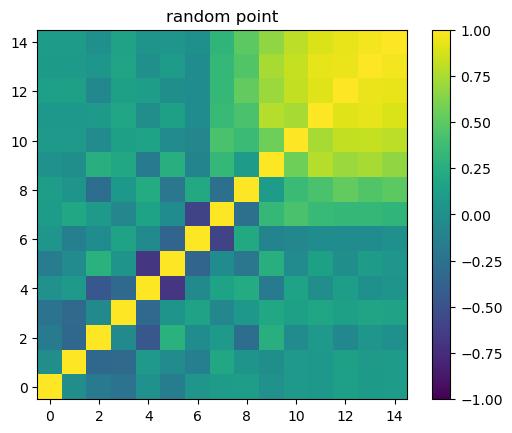

In [5]:
mean_r = weight_nan_mean(value_r, weight_r)
def jackknife_resample_r(i):
    idx = pix_r != i
    return weight_nan_mean(value_r[idx], weight_r[idx])
pro = mp.Pool(20)
result = pro.map(jackknife_resample_r, np.unique(pix_r))
jack_val_r = np.vstack(result)
cov_mat = np.cov(jack_val_r, ddof=1, rowvar=False)
std_r = np.std(jack_val_r, axis=0, ddof=1)
for i in range(cov_mat.shape[0]):
    for j in range(cov_mat.shape[0]):
        cov_mat[i,j] /= std_r[i]*std_r[j]
plt.imshow(cov_mat, origin='lower', vmin=-1, vmax=1)
plt.title('random point')
plt.colorbar()
plt.show()

## signal

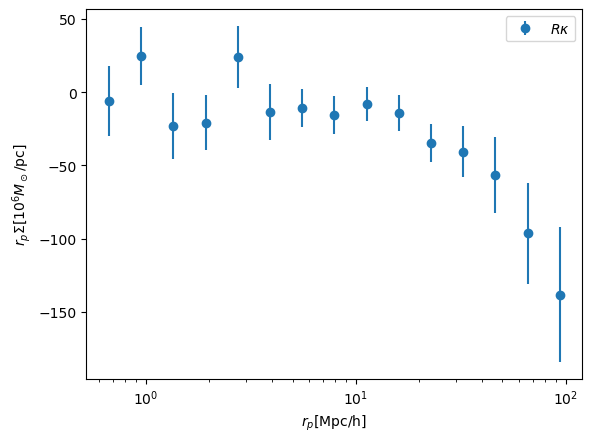

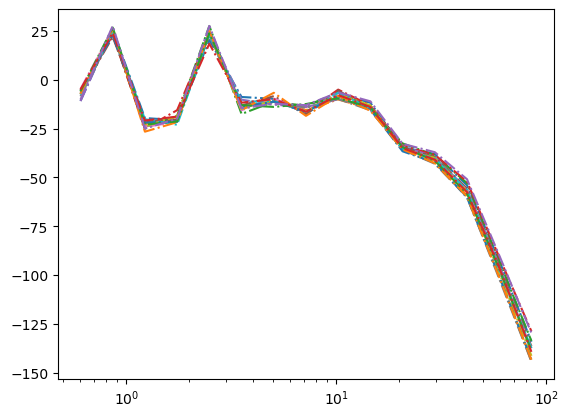

In [7]:
r_bins = np.geomspace(0.5, 100, 15+1)        # unit: cMpc/h
r = (r_bins[1:]+r_bins[:-1])/2
plt.errorbar(r*1.05*1.05, r*mean_r, r*std_r*np.sqrt(len(np.unique(pix_r))), label='$R\\kappa$', fmt='o')
plt.semilogx()
plt.xlabel('$r_p[\\mathrm{Mpc/h}]$')
plt.ylabel('$r_p\\Sigma[10^6 M_\\odot/\\mathrm{pc}]$')
# plt.ylim(top=50)
plt.legend()
plt.show()

for i in range(jack_val_r.shape[1]):
    plt.plot(r, r*jack_val_r[i], '-.')

plt.semilogx()
plt.show()

In [ ]:
dat_r = np.load('../calculation_data/result_r=0.5_100_15_random_point_tree.npy')
value_r = dat_r[0]
weight_r = dat_r[1]

theta, phi = np.loadtxt('../catalogue/random_sample_theta_phi_5_000_000').T
Nquas = len(theta)
pix_r = hp.ang2pix(Nside_jack, theta=theta, phi=phi)
